# LLC Pre-processing

In [2]:
# imports
import h5py

import os
import numpy as np

import pandas

import h5py

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import seaborn as sns

from ulmo.utils import image_utils


# Load up MODIS 2010 for Training disribution

In [4]:
modis_pp_2010_file = os.path.join(os.getenv('SST_OOD'), 'MODIS_SST', 'PreProc', 
                                  'MODIS_R2019_2010_95clear_128x128_preproc_std.h5')

In [5]:
f_modis = h5py.File(modis_pp_2010_file, mode='r')

In [6]:
f_modis.keys()

<KeysViewHDF5 ['train', 'train_metadata', 'valid', 'valid_metadata']>

In [9]:
train_meta = f_modis['train_metadata']
# Hack for bug
clms = train_meta.attrs['columns'].tolist()
#if 'mean_temperature' in clms:
#    clms.remove('mean_temperature')
train_meta = pandas.DataFrame(train_meta[:].astype(np.unicode_),
                            columns=clms)

In [18]:
train_meta['latitude'] = train_meta.latitude.values.astype(float)
train_meta['longitude'] = train_meta.longitude.values.astype(float)

In [19]:
train_meta.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,tmp
0,AQUA_MODIS.20100806T062508.L2.SST.nc,304,805,20.111063,-67.497110,0.02764892578125,29.125587463378906,27.69999885559082,30.69499969482422,30.029998779296875,28.584999084472656,20.111063
1,AQUA_MODIS.20101216T223508.L2.SST.nc,272,773,-2.129871,46.129204,0.036376953125,27.745418548583984,26.779998779296875,28.420000076293945,27.979999542236328,27.514999389648438,-2.129871
2,AQUA_MODIS.20101224T214500.L2.SST.nc,112,581,1.553729,57.486620,0.04217529296875,27.745101928710938,26.35999870300293,28.529998779296875,28.059999465942383,27.369998931884766,1.553729
3,AQUA_MODIS.20100725T223507.L2.SST.nc,1600,592,-12.398787,42.314100,0.04998779296875,25.85610580444336,23.799999237060547,26.739999771118164,26.170000076293945,25.48499870300293,-12.398787
4,AQUA_MODIS.20100422T190000.L2.SST.nc,1584,965,8.551046,103.123344,0.0169677734375,30.99410629272461,29.209999084472656,32.04499816894531,31.42999839782715,30.48499870300293,8.551046


## Spatial plot

In [20]:
# Healpix me
nside = 32
hp_events, hp_lons, hp_lats = image_utils.evals_to_healpix(
    train_meta, nside, log=False, mask=True)

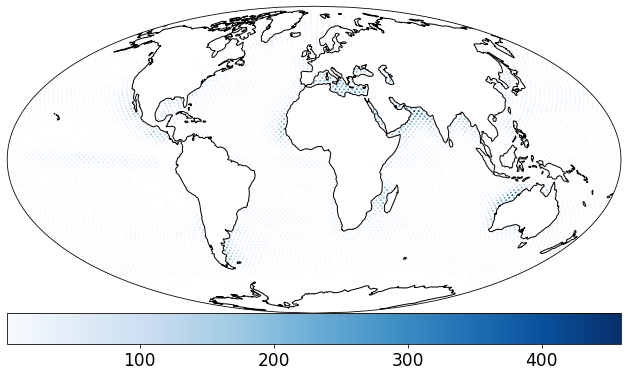

In [23]:
fig = plt.figure(figsize=(11, 7))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)


cm = plt.get_cmap('Blues')
# Cut
good = np.invert(hp_events.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_events[good],
    cmap=cm,
    s=1,
    transform=tformP)
#
# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
#clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
#cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines
ax.coastlines(zorder=10)
ax.set_global()

#
#plt.savefig('aph_spatial_1st.png', dpi=300)

plt.show()

# Draw randomly according to this distribution

In [24]:
valid_meta = f_modis['valid_metadata']
# Hack for bug
clms = valid_meta.attrs['columns'].tolist()
#if 'mean_temperature' in clms:
#    clms.remove('mean_temperature')
valid_meta = pandas.DataFrame(valid_meta[:].astype(np.unicode_),
                            columns=clms)

In [25]:
len(valid_meta)

542845